# <SPAN style=color:darkgreen>RELATIONSHIPS BETWEEN VARIABLES</SPAN>

Siguiendo como plantilla el notebook __"03-Examination data"__ para realizar el analisis de los datos contenidos en el archivo $tips.csv$.
Para ello usaremos la biblioteca $seaborn$ para poder graficar los datos.

# <span style=color:darkblue>EXAMINING NUMERICAL DATA</span>

We will be introduced to techniques for <span style=color:blue>exploring</span> and <span style=color:blue>summarizing numerical</span> variables, working with one dataset : '$tips$'.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <span style=color:darkgreen>EXPLORING BIVARIATE VARIABLES WITH SCATTERPLOTS</span>


Empezamos cargando  el archivo de datos , ver que tipos de datos contiene y como estan organizados:

In [2]:
# Open the choosen file
tips_df = pd.read_csv('tips.csv')

In [3]:
tips_df.shape
#dimensiones de los datos

(244, 7)

In [4]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


después miramos los campos de de las columnas y  el tipo de datos que contienen

In [5]:
tips_df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
tips_df.describe().round(3)


,total_bill,tip,size
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


In [7]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


En este primer vistazo podemos tener una idea general del tipo de datos que tenemos.Vemos que hay 2 campos con variables cuantitativas ($"total_bill"$ y $"tip"$).
El resto de los campos poseen variables de tipo categórica,algunas como $"sex"$ ,$"time"$ o $"smoker"$ tienen 2 variables y otras como 
$"day"$ o $"size"$ estan categorizadas en más variables.
Para empezar a analizar , vamos a introducir un nuevo campo $"pct"$ que sera el resultado de :
\begin{align*}pct\:=\:\frac{tip*100}{total bill-tip} \end{align*}
que sera el % de propina respecto al total de la cuenta.


In [8]:
tip_pct=[round((tips_df['tip'] / (tips_df['total_bill'] - tips_df['tip']))*100, 2)]


tips_df.insert(2,"pct",(round((tips_df['tip'] / (tips_df['total_bill'] - tips_df['tip']))*100, 2)) ,allow_duplicates=False)

tips_df.describe().round(2)

,total_bill,tip,pct,size
count,244.00,244.00,244.00,244.00
mean,19.79,3.00,20.21,2.57
std,8.90,1.38,16.34,0.95
min,3.07,1.00,3.70,1.00
25%,13.35,2.00,14.83,2.00
50%,17.80,2.90,18.31,2.00
75%,24.13,3.56,23.68,3.00
max,50.81,10.00,245.24,6.00


Ahora vamos a usar el gráfico de puntos para ver si hay un índicio de relación lineal entre le porcentaje de la propina y el total de la propina.

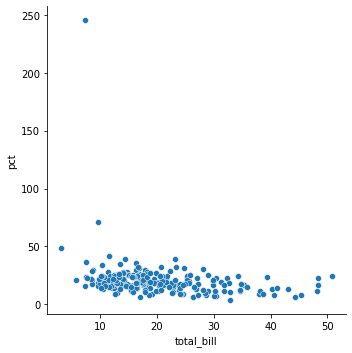

In [9]:
sns.relplot(x="total_bill",y="pct",data=tips_df)

vemos algún candidato a datos outliers , ahora que estamos en la previa hacemos un  filtrado rápido viendo los 3 valores mayores que són lo s que a simple vista tiene serias dudas.Pâra ello sacamos los valores de $pct$ en orden descendente.

In [10]:
tips_df.pct.sort_values(ascending=False)[:5]



172    245.24
178     71.43
67      48.31
232     41.24
183     38.99
Name: pct, dtype: float64

filtraremos a partir de 48%, después ya examinaremos los datos com más rigor y criteiro.Ahora buscamos solo cierto indicios generales

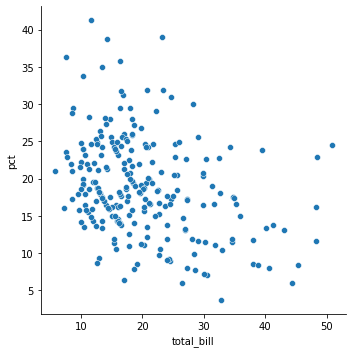

In [11]:
sns.relplot(x="total_bill",y="pct",data=tips_df[tips_df["pct"]<48])

La gráfica no nos induce a pensar en que haya una relación entre la cantidad del precio de la cuentay el % de propina que se dejan los comensales.Más bien parece indicar a hay cierto consenso social sobre que la propina debe estar en un entorno del 20% del total. Esto se puede comprobar al hacer un gráfico de $tip$ vs $total_bill& ya que al ser un porcentaje fijo se vera cono una relación lineal.

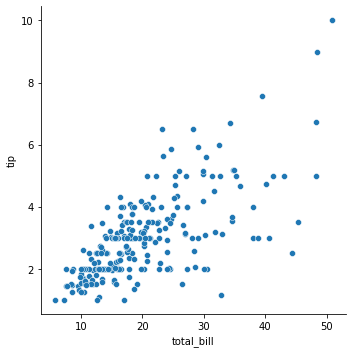

In [12]:
sns.relplot(x="total_bill",y="tip",data=tips_df[tips_df["pct"]<48])

vamos a ver si nuestra estimación del 20% se ajusta tal como deberia ser.Dibujando una recta de pendiente 0.2

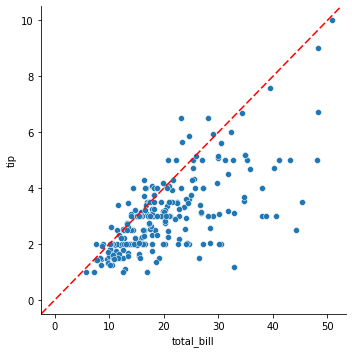

In [13]:
(sns.relplot(x="total_bill",y="tip",data=tips_df[tips_df["pct"]<48])).ax.axline(xy1=(0, 0), slope=.2, color="red", dashes=(5, 2))


Examinemos de manera rápida el resto de variables.

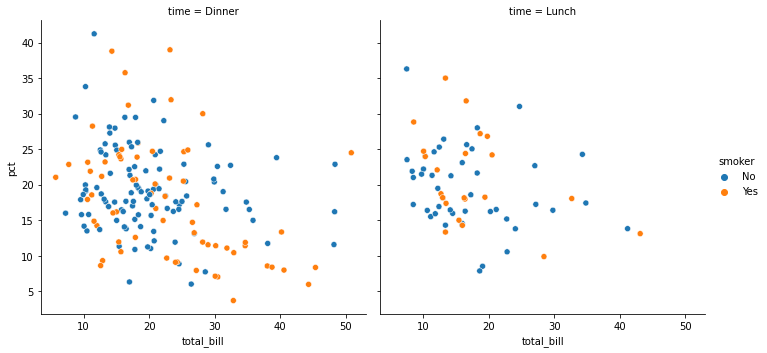

In [14]:
sns.relplot(x="total_bill",y="pct",hue="smoker",col="time",data=tips_df[tips_df["pct"]<48])

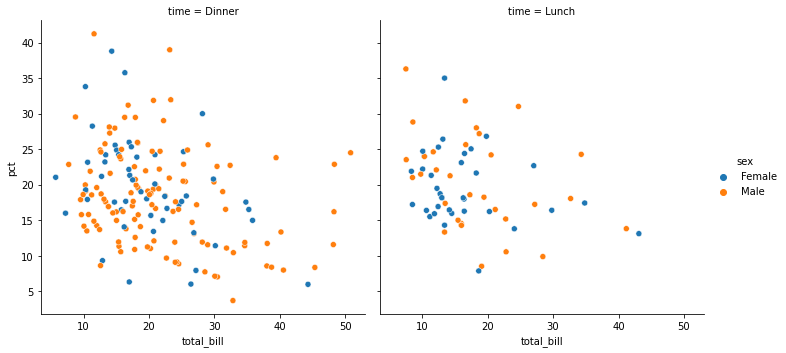

In [15]:
sns.relplot(x="total_bill",y="pct",hue="sex",col="time",data=tips_df[tips_df["pct"]<48])

No vemos una relación que se muestre fácilmente.
Con __day__ y __size__ nos sera difícil ver algo al haber tantas variables.Podemos hacer un resumen de todos mediante una matrix plot

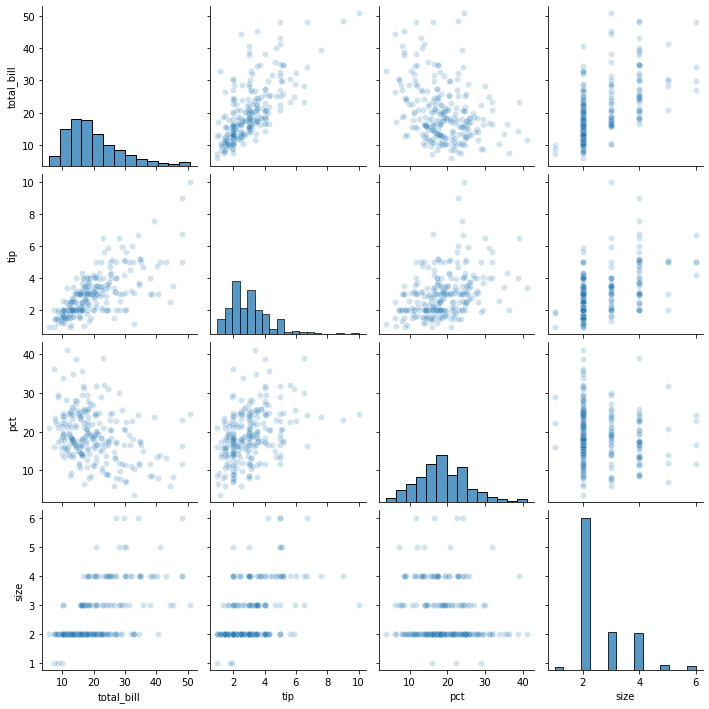

In [16]:
# Matrix Plot
sns.pairplot(tips_df[tips_df["pct"]<48], diag_kind='hist', plot_kws={'alpha': 0.2})

## <span style=color:darkgreen>HISTOGRAMS</span>

El histograma nos permite observar los datos de una forma rápida y poder sacar unas primeras impresiones. Por eejmplo, si los datos se agrupan entorno a un valor concreto, como de dispersos són los datos, existe más de un pico , tienen simetría o estan sesagadas.

Text(0.5, 0, '% Tips')

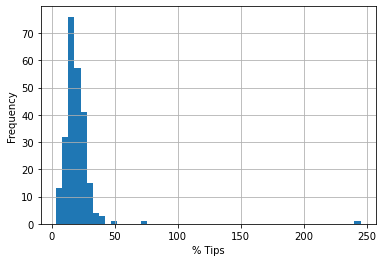

In [18]:
tips_df.pct.hist(bins=50)
#plt.title('Generosos-% tips')
plt.ylabel('Frequency')
plt.xlabel('% Tips')

Podemos observar que los datos se agrupan alrededor del 20% y que existen algunos datos unusuales.Si quítamos los valores más extremos podemos apreciar cierta simetría.

Text(0.5, 0, '% Tips')

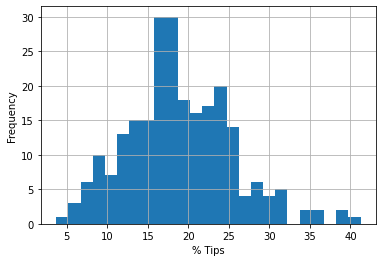

In [19]:
(tips_df[tips_df["pct"]<48]).pct.hist(bins=25)
#plt.title('Generosos-% tips')
plt.ylabel('Frequency')
plt.xlabel('% Tips')

## <span style=color:darkgreen>Mean - Average</span>

Para calcular la media , simplemente se hace un sumatorio de todos datos y se divide entre el número de observables.

\begin{align*}\bar{x}\:=\:\frac{6.32+19.12\:+\:...\:+\:17.82}{243}\:=\: 20.21\end{align*}

La fórmula general se escribiría de la siguiente manera:

\begin{align*}\bar{x}\:=\:\frac{x_1\:+\:x_2\:+\:· · ·\:+\:x_n}{n}\end{align*}   

<span style=color:red><b><u>EXERCISE - 3.1</u></b></span> 

Compare both Equations above. 

* What does $x_1$ correspond to ?,   
<span style=color:green>SOL </span> El primer dato del campo _pct_

* and **$x_2$** ?   
<span style=color:green>SOL </span> El segundo dato del campo _pct_

* Can you infer a general meaning to what $x_i$ might represent?<br>
<span style=color:green>SOL </span> El enésimo dato del campo _pct_

* What was $n$ in this sample of emails?<br>
<span style=color:green>SOL </span> La cantidad de datos del campo _pct_

<span style=color:red><b><u>EXERCISE - 3.2</u></b></span>

¿Es la media obtenidos de nuestros datos una buena estimación de la media de la población?

<span style=color:green><b><u>SOLUTION - 3.2</u></b></span>


 En el caso de nuestro ejemplo , carecemos del contexto de los datos y de lo que queremos representar mediante nuestros modelos.Por ej no sabemos si los datos son de 1 sola semana o más, un único local.No sabemos si era en temporada alta obaja, la zona donde se han recogido , la renta media de la zona etc....
 Si nuestro universo poblacional fuera muy restringido ,por ejemplo , un único local , y para un período de tiempo concreto podría ser útil.Pero cuanto más queramos extrapolar nuestras conclusiones , menos representativo seran los datos.

## <span style=color:darkgreen>Variance and Standard Deviation</span>

### <span style=color:darkred>Varianza</span>

Para poder evaluar la variabilidad de los datos podemos usar la varianza y la desviación estandard.

La varianza nos describe que tal lejos estan los datos de la media.
Esto se calcula restando a cada observable la media y después elevando al cuadrado para impedir que las diferencias con la media se anulen entre si.
En nuestro ejemplo seria:

In [21]:
#vemos los primeros valores 
print("Primeros valores del campo pct")
tips_df.pct[:3]

Primeros valores del campo pct


0     6.32
1    19.12
2    19.99
Name: pct, dtype: float64

In [22]:
#ahora el último valor
print("Último valor de pct")
tips_df.pct[-2:-1]

Último valor de pct


242    10.89
Name: pct, dtype: float64

In [23]:
#y por último la media
print("valor de la media de pct")
round(tips_df.pct.mean(),2)

valor de la media de pct


20.21

\begin{align*}x_1\:−\:\bar{x} = 6.32− 20.21 = -13.89\end{align*} \\
\begin{align*}x_2\:−\:\bar{x} =\hspace{2.5mm}19.12 − 20.21 = −1.09\end{align*}\\
\begin{align*}x_3\:−\:\bar{x} =\hspace{2.5mm}19.99 − 20.21 = −0.29\end{align*}\\
\begin{align*}.\end{align*}\\
\begin{align*}.\end{align*}\\
\begin{align*}.\end{align*}\\
\begin{align*}x_{243} − \bar{x} = 10.89 − 20.21 = -9.32\end{align*}

\begin{align*}s^2\:=\:\frac{(-13.89)^2 + (−1.09)^2 + (−0.29)^2 + · · · + 9.32^2}{243 − 1} = 265.86\end{align*}

In [24]:
print("varianza calculada para el campo pct")
round(np.var(tips_df.pct),2)

varianza calculada para el campo pct


265.86

Al elevar al cuadrado las diferencias respecto la media , debemos tener cuidado ya que valores anómalos altos pueden distorsionar su interpretación.

In [25]:
print("Varianza filtrando valores anómalos más extremos:")
round(np.var(tips_df[tips_df.pct<48]),2)

Varianza filtrando valores anómalos más extremos:


/home/toni/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3700: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


total_bill    77.64
tip            1.89
pct           43.30
size           0.90
dtype: float64

### <span style=color:darkred>Standard Deviation</span>

La desviación estandard se define como la raiz cuadrada de la varianza :   
 
\begin{align*}s = \sqrt{265.86} = 16.31\end{align*}   

Para calcularla con nuestro datos , solo tenemos que usar el siguiente código:

In [26]:
#std
round(tips_df.pct.std(),3)


16.339

<span style=color:red><b><u>EXERCISE - 3.6</u></b></span> 

A good <span style=color:blue>description of the shape of a distribution</span> should include <span style=color:blue>modality</span> and whether the <span style=color:blue>distribution</span> is <span style=color:blue>symmetric or skewed</span> to one side. 

Explore the figure as an example, explain why such a description is important :

<img src="Std.jpeg">

<span style=color:green><b><u>SOLUTION - 3.6</u></b></span> 

Para describir las distribuciones de la imagen superior nos centraremos en su modalidad y su simetria.

Al referirnos a su modalidad lo hacemos , básicamente, a cuantos picos podemos distingir en la distribución.En este caso la primera imagen de la izquierda es bimodal (dos picos), las otras dos son unimodales.Esta carácteristica nos puede indicar que en el caso de que sea bimodal o multimodal , puede haber más de un factor que afecte a las variables o que sea cíclico , por ej.

La simetria de la distribución de la imagen de la derecha estaría sesgada hacia la izquierda. El no ser simetrica nos indica que la media y la mediana no coincidiran .Esta falta de simetria nos puede indicar que un proceso tiene algun factor que hace que tenga una tendencia.



<span style=color:red><b><u>EXERCISE - 3.7</u></b></span> 

Haz la descripción del histograma del campo _pct_ en _tips.csv_

<span style=color:green><b><u>SOLUTION - 3.7</u></b></span> 

Primero gráficamos el histograma

Text(0.5, 0, '# % tip ')

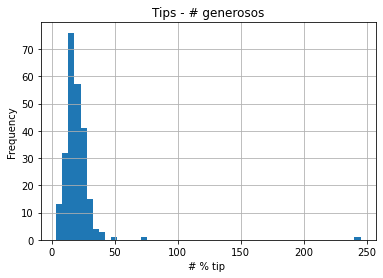

In [27]:
tips_df.hist(['pct'], bins=50)
plt.title('Tips - # generosos')
plt.ylabel('Frequency')
plt.xlabel('# % tip ')

En el podemos obervar que es unimodal , un pico bien definido y con simetria, si exceptuamos los valores mas alejados que al ser pocos nos indican posibles outliers, que serán mejor estudiados en el siguiente apartado.

## <span style=color:darkgreen>BOX PLOTS</span>

Los boxplots nos permite visualizar datos estadísticos fácilmente y además detectar valores anómalos o outliers.

### <span style=color:darkred>Quartiles, and the Median</span>

Para crear un diagrama de caja o boxplot necesitamos la mediana , y los valores del primer y tercer cuartil

La mediana es el valor que se encuentra en en el centro de los datos , es decir que tiene la mitad de los datos por encima y la otra mitad por debajo al ordenarse.Seria equivalente al segundo cuartil (50%).
los cuartiles són los que engloban al 25%,50%,y 75% de los datos una vez ordenados.
El primer y tercer cuartil marcaran los límites de la caja y la mediana una linea dentro de la caja.
Ademas dibujaremos unas lineas que abarcaran 1,5 veces el valor entre el primar y el tercer caurtil. a esto lo llamaremos __RIC__ y nos permite evaluar posibles outliers , que seran los valores que se encuentren más alla de estos valores.

interpretación boxplot:

lo interesante del empleo de boxplot es que nos permite de un vistazo hacer una rápida evaluación estadística de los datos.por ej:
* podemos ver la símetria de la distribución a traves de la posición de la mediana en la caja. si es simetrica se encontrara en el centro de la caja.
* Nos podemos hacer una idea de la dispersión de los datos por la altura de la caja 
* nos permite ver posibles valores outliers facilmente 

A continuación dibujaremos el diagrama de caja de los valores del campo pct(% de propinas) y la agrupacion de datos, tanto en gráficos separados como en conjunto.

/home/toni/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


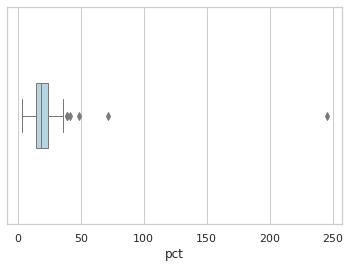

In [28]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=tips_df.pct, color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)

/home/toni/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='pct'>

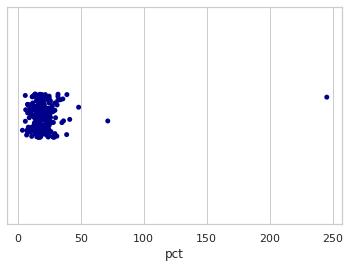

In [29]:
sns.stripplot(x=tips_df.pct, orient='v', color='darkblue')

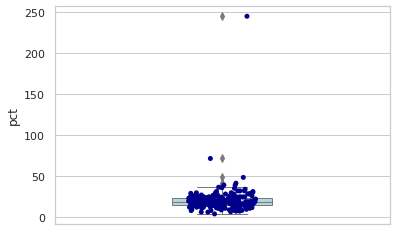

In [30]:
ax = sns.boxplot(y="pct", data=tips_df,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips_df.pct, orient='v', color='darkblue')

Filtramos los valores más extremos (>50) para poder apreciar el boxplot mejor

<AxesSubplot:ylabel='pct'>

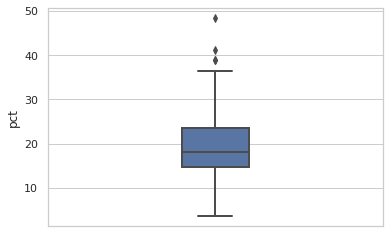

In [31]:
bx=tips_df[tips_df.pct<50]
sns.boxplot(y="pct",data=bx,linewidth=2,width=0.2)

Vemos que aún nos quedan 3 candidatos para valores anómalos.Vemos los valores más altos del campo _pct_

In [32]:
tips_df.pct.sort_values(ascending=False)[:10]

172    245.24
178     71.43
67      48.31
232     41.24
183     38.99
109     38.80
149     36.30
93      35.77
221     35.01
51      33.81
Name: pct, dtype: float64

Como habíamos descartado hasta el 50 ,ppodemos intuir que el límite debe hallarse alredor de un valor de 38. 

<span style=color:red><b><u>EXERCISE - 3.8</u></b></span> 

1. What percent of the data fall between Q1 and the median?<br>
<span style=color:green>SOL:</span> Como ya he comentado la mediana es como el segundo cuartil por lo tanto (50%-25%=25%), se hallaría el 25% de los datos.<br>
2. What percent is between the median and Q3?<br>
<span style=color:green>SOL:</span> Misma lógica que la anterior pregunta e igual resultado :25%.

<span style=color:red><b><u>EXERCISE - 3.9</u></b></span> 

estimate the following values for **pct** in the $tips$ dataset: 

a).- $Q1$,   
b).- $Q3$, and    
c).- $IQR$

<span style=color:green><b><u>SOLUTION - 3.9</u></b></span> 

A ojimetro podemos estimar: Q1 = 15, Q3 = 24, IQR = Q3 - Q1 = 9. 

In [33]:
(tips_df.pct).describe()

count    244.000000
mean      20.212418
std       16.338588
min        3.700000
25%       14.830000
50%       18.310000
75%       23.682500
max      245.240000
Name: pct, dtype: float64

Los valores reales serian :Q1 = 14.83, Q3 = 23.68, IQR = 8.85.
y por lo tanto los valores límites para outliers serian de Q1-1.5IQR=1.56 y Q3+1.5IQR=36.96 , lo cual cuadra bastante con las estimaciones que hemos realizado anteriormente.

## <span style=color:red>Ejercicio Práctico -- Sacando conclusiones</span>

Al principio ya hemos observado que no habia una relación lineal entre el % del tip que se da con la cantidad de la cuenta y aparentemente tampoco con otros datos.¿pero existe alguna tendencia u anormalidad que podamos extraer de estos datos.? Veamos mediante graficos del % de propina vs los campos categóricos.

<AxesSubplot:xlabel='sex', ylabel='pct'>

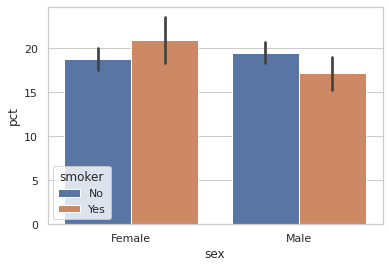

In [34]:
sns.barplot(x="sex",y="pct",hue="smoker",data=tips_df[tips_df["pct"]<48])

<AxesSubplot:xlabel='day', ylabel='pct'>

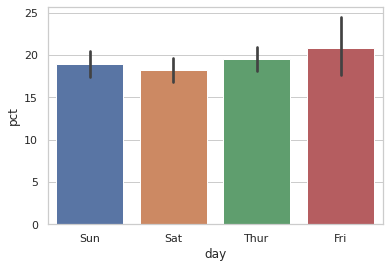

In [35]:
sns.barplot(x="day",y="pct",data=tips_df[tips_df["pct"]<48])

<AxesSubplot:xlabel='day', ylabel='pct'>

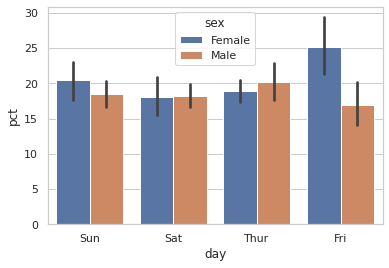

In [36]:
sns.barplot(x="day",y="pct",hue="sex",data=tips_df[tips_df["pct"]<48])

Vaya parece que los viernes las clientas son mucho más generosas y la clientela masculina es más bien tacaña.Después volveremos para examinar mejor los datos. Veamos si los fumadores son mas genereosos o no

<AxesSubplot:xlabel='day', ylabel='pct'>

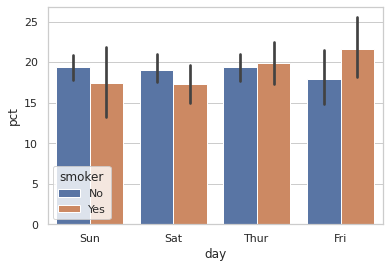

In [37]:
sns.barplot(x="day",y="pct",hue="smoker",data=tips_df[tips_df["pct"]<48])

No parece haber una relación clara entre ser o no fumador y la generosidad en las propinas.

Volvamos a nuestro descubrimiento sobre las noches del viernes y examinemos los datos gráficamente con un poco más de detalle. Primero con todos los datos agrupados por dias y diferenciados por sexo.(filtramos los outliers más extremos para tener gráficos aceptables)

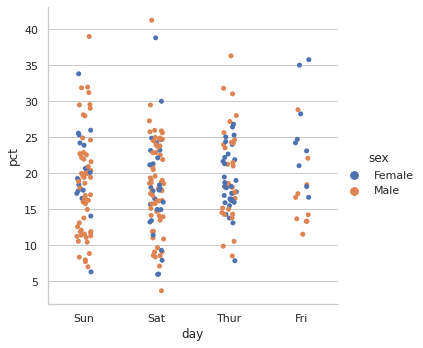

In [38]:
sns.catplot(x="day",y="pct",hue="sex",data=tips_df[tips_df["pct"]<48])


ya que cada punto representa un dato , vemos que los viernes tenemos una cantidad de datos menor que en los otros dias.
Esta falta de datos puede hacer que sean las explicacion de esta falta de representatividad de los datos .vemos que podemos tener 2 outliner alrededor de 35%.Miremos las boxplot para comprobar

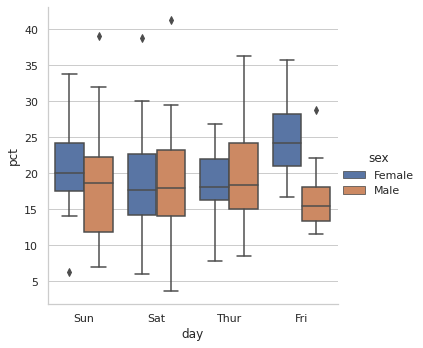

In [39]:
sns.catplot(x="day",y="pct",hue="sex",kind="box",data=tips_df[tips_df["pct"]<48])

Obervamos varios outliers , pero no en el caso de las mujeres los viernes. Es más si filtramos hasta el 35% de tips para descatar esos 2 valores más altos de las féminas , veremos que la gráfica no cambia sustancialmente.

<AxesSubplot:xlabel='day', ylabel='pct'>

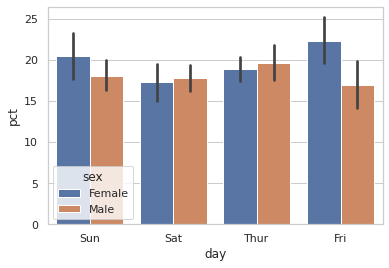

In [40]:
sns.barplot(x="day",y="pct",hue="sex",data=tips_df[tips_df["pct"]<35])

<AxesSubplot:xlabel='sex', ylabel='pct'>

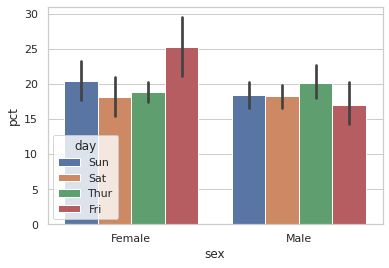

In [41]:
sns.barplot(x="sex",y="pct",hue="day",data=tips_df[tips_df["pct"]<48])

Podemos explicar esta observación a que no tenemos suficientes datos y que hacen que no sean representativos , ya que en el resto de días no observamos una tendencia tan clara.También podría ser que haya un grupo de clientas especialmete esplendororsas que acuden los viernes y que al haber menos clientes hacen variar la estadística.

Ahora miraremos la cantidad clientes según las demás categorias:

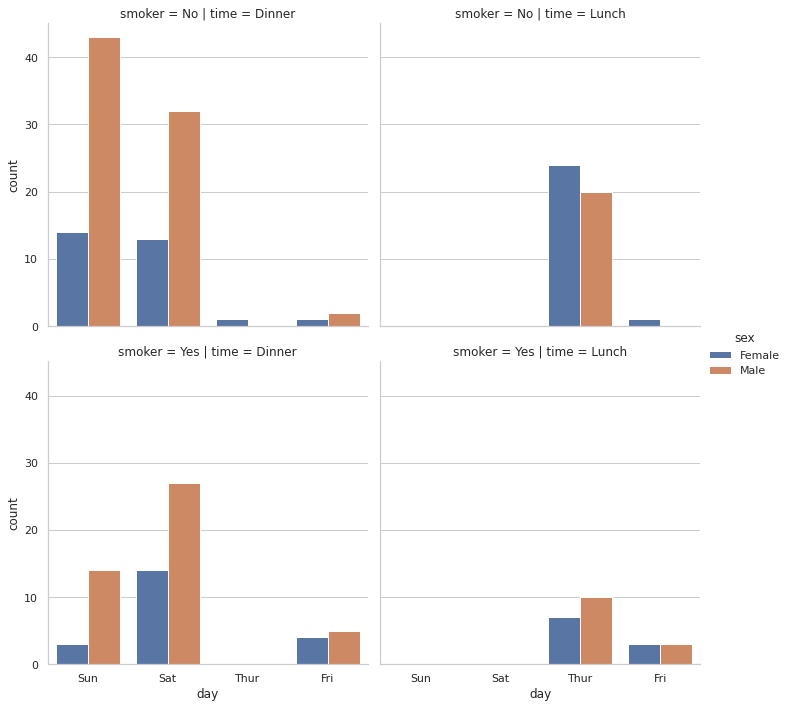

In [55]:
sns.catplot(x="day",hue="sex",col="time",row="smoker",data=tips_df[tips_df["pct"]<48],kind="count")

Parece ser que el local abre de jueves a domingo , pero solo sirve comidas jueves y viernes.Y como hemos visto con anterioridad la actividad de los viernes es bastante menor al resto de días.
Exploramos los datos referentes al número de comensales y los dias para ver que nos dicen.

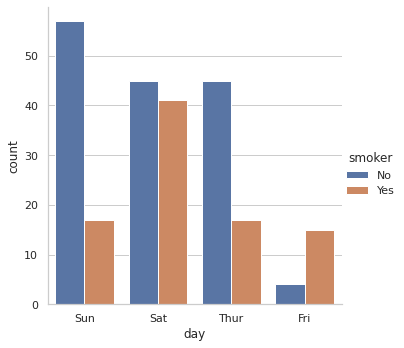

In [44]:
sns.catplot(x="day",hue="smoker",data=tips_df[tips_df["pct"]<48],kind="count")

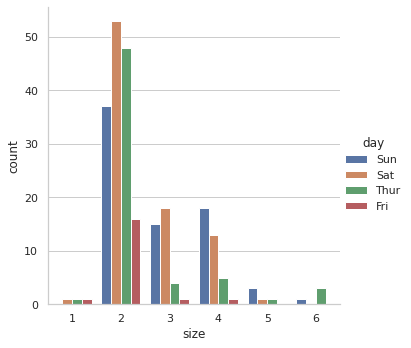

In [45]:
sns.catplot(x="size",hue="day",data=tips_df[tips_df["pct"]<48],kind="count")

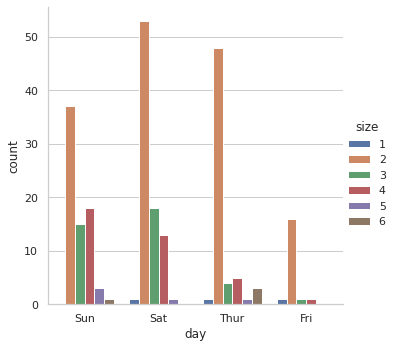

In [46]:
sns.catplot(x="day",hue="size",data=tips_df[tips_df["pct"]<48],kind="count")

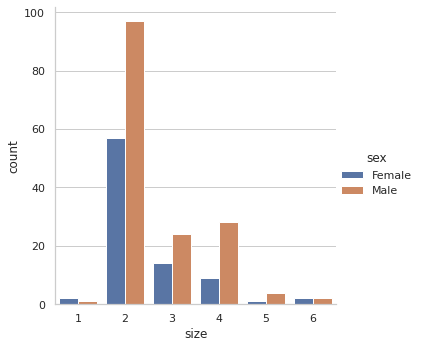

In [47]:
sns.catplot(x="size",hue="sex",data=tips_df[tips_df["pct"]<48],kind="count")

Observamos que la mayoría de los clientes del local són mesas de 2 personas, y que solo los fines de semana hay una representación 
significativa de grupos de 3/4 personas.

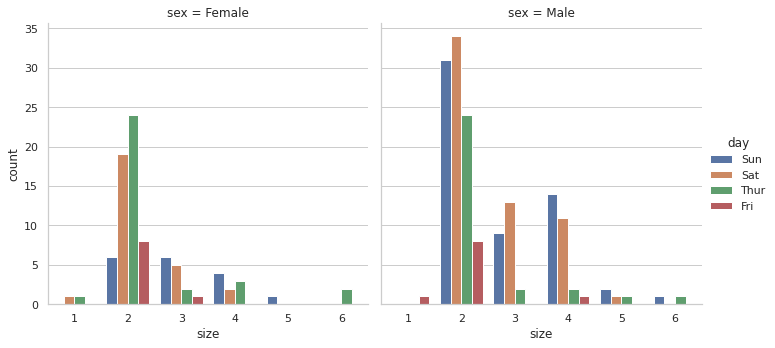

In [48]:
sns.catplot(x="size",hue="day",col="sex",data=tips_df[tips_df["pct"]<48],kind="count")

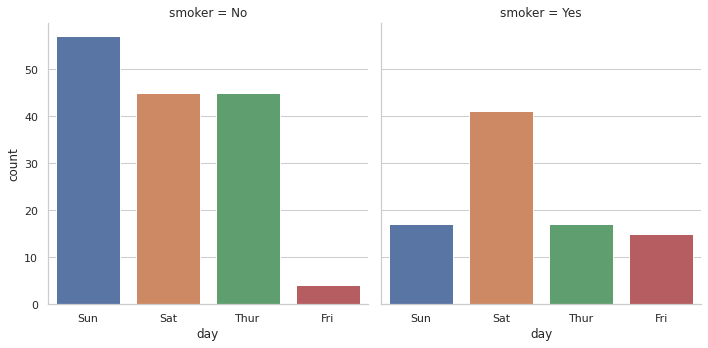

In [49]:
sns.catplot(x="day",col="smoker",data=tips_df[tips_df["pct"]<48],kind="count")

para terminar examinamos el viernes con más detenimiento para ver si hay alguna anómalia más.

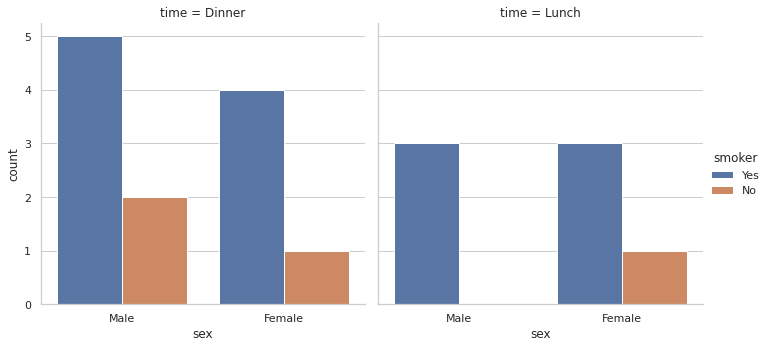

In [50]:
sns.catplot(x="sex",hue="smoker",col="time",data=tips_df[tips_df["day"]=="Fri"],kind="count")

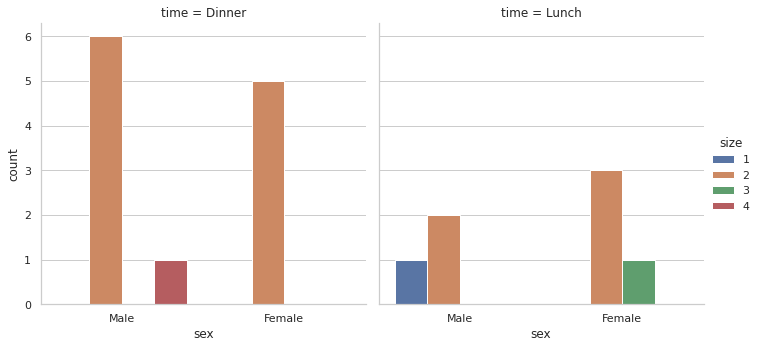

In [51]:
sns.catplot(x="sex",hue="size",col="time",data=tips_df[tips_df["day"]=="Fri"],kind="count")

Con tan pocos datos y falta de contexto de los datos , no se puede extraer gran cosa, ya que es posible que sean poco representativos.Por lo tanto todas las hipótesis deberían ser confirmadas con datos extra o más datos.

